Linear Regression with Regularization

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [ ]:
class LinearRegressionRegularized:
    def __init__(self, alpha=0.01, lambda_=0.1, n_iterations=1000):
        self.alpha = alpha
        self.lambda_ = lambda_
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            # gradients
            dw = (1 / n_samples) * (np.dot(X.T, (y_predicted - y)) + self.lambda_ * self.weights)
            db = (1 / n_samples) * np.sum(y_predicted - y)
            # Update param
            self.weights -= self.alpha * dw
            self.bias -= self.alpha * db
            # if smaller than 1/10^8 then break
            if np.all(np.abs(self.alpha * dw) < 1e-8) and np.abs(self.alpha * db) < 1e-8:
                break

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.drop('medv', axis=1)
y = df['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegressionRegularized(alpha=0.001, lambda_=0.1, n_iterations=10000)
model.fit(X_train_scaled, y_train)

train_predictions = model.predict(X_train_scaled)
test_predictions = model.predict(X_test_scaled)

train_mse = np.mean((train_predictions - y_train) ** 2)
test_mse = np.mean((test_predictions - y_test) ** 2)

print("Weights:", model.weights)
print("Bias:", model.bias)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Weights: [-0.86922274  0.41728165 -0.07017497  0.76253993 -1.58709874  3.31490463
 -0.20647099 -2.65561942  1.18154713 -0.71673282 -1.93542316  1.13952873
 -3.55767912]
Bias: 22.795504857718342
Training MSE: 21.861239405885335
Testing MSE: 25.34918095073093


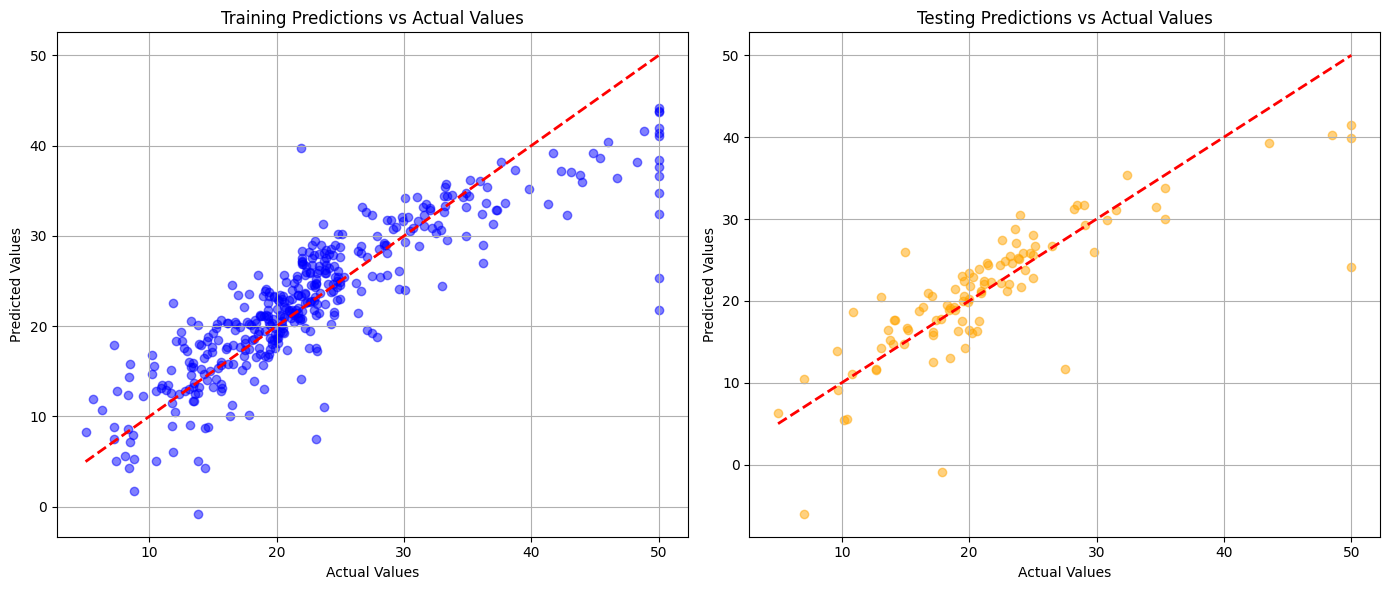

In [ ]:
#Plotting the predictions vs actual values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, train_predictions, color='blue', alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.title('Training Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, test_predictions, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Testing Predictions vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)

plt.tight_layout()
plt.show()


Multiple
Linear Regression with regularisation using
Sklearn

Multiple Linear Regression:
  Mean squared error: 24.2911
  R-squared score: 0.6688
  Coefficients: [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]
  Intercept: 30.2468

Ridge Regression:
  Mean squared error: 24.4772
  R-squared score: 0.6662
  Coefficients: [-1.09234061e-01  3.22706863e-02  7.49805942e-03  2.54546998e+00
 -9.53795159e+00  4.46450537e+00 -1.21910176e-02 -1.33870040e+00
  2.48881816e-01 -1.14746211e-02 -8.28604284e-01  1.26421124e-02
 -5.23833016e-01]
  Intercept: 25.1041

Lasso Regression:
  Mean squared error: 24.4095
  R-squared score: 0.6671
  Coefficients: [-0.07660927  0.02850064 -0.          0.         -0.          1.63048892
  0.01639478 -0.63085765  0.21965363 -0.01228558 -0.70858233  0.0111811
 -0.74710661]
  Intercept: 34.9358



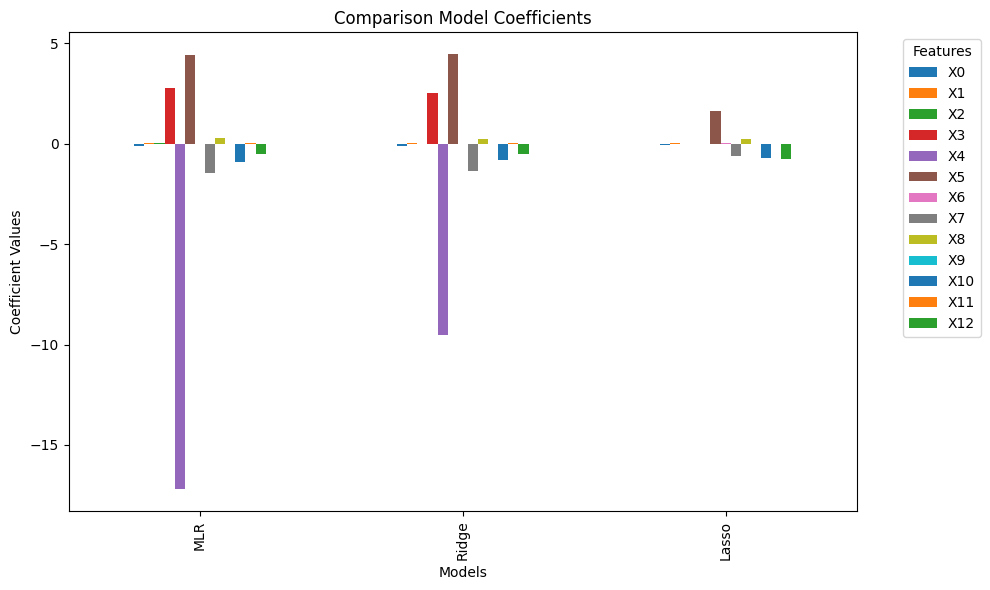

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = df.drop('medv', axis=1)
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlr = LinearRegression()
mlr.fit(X_train, y_train)

#Ridge Regression (L1 regularization)
#alpha=lambda
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

#Lasso Regression (L2 regularization)
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

y_pred_mlr = mlr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

# metrics
def metrics(name, model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  Mean squared error: {mse:.4f}")
    print(f"  R-squared score: {r2:.4f}")
    print(f"  Coefficients: {model.coef_}")
    print(f"  Intercept: {model.intercept_:.4f}\n")

metrics("Multiple Linear Regression", mlr, y_test, y_pred_mlr)
metrics("Ridge Regression", ridge, y_test, y_pred_ridge)
metrics("Lasso Regression", lasso, y_test, y_pred_lasso)

#coefficients
models = [mlr, ridge, lasso]
model_names = ['MLR', 'Ridge', 'Lasso']
coef_df = pd.DataFrame(
    [model.coef_ for model in models],
    index=model_names,
    columns=[f'X{i}' for i in range(X.shape[1])]
)

"""
                       X0         X1         X2        X3
Linear Reg         59.840123  94.521023  85.136472  23.011945
Ridge Reg          59.798914  94.485604  85.126972  22.981224
Lasso Regression   59.755006  94.450672  85.091312  22.973100

"""

coef_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison Model Coefficients')
plt.xlabel('Models')
plt.ylabel('Coefficient Values')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Simple Linear Regression with and without regularisation using Sklearn

Linear Regression:
  Coefficient: 6.6240
  Intercept: 22.7965
  Mean squared error: 46.1448
  R-squared score: 0.3708

Ridge Regression:
  Coefficient: 6.6076
  Intercept: 22.7965
  Mean squared error: 46.1170
  R-squared score: 0.3711

Lasso Regression:
  Coefficient: 5.6240
  Intercept: 22.7965
  Mean squared error: 45.3508
  R-squared score: 0.3816



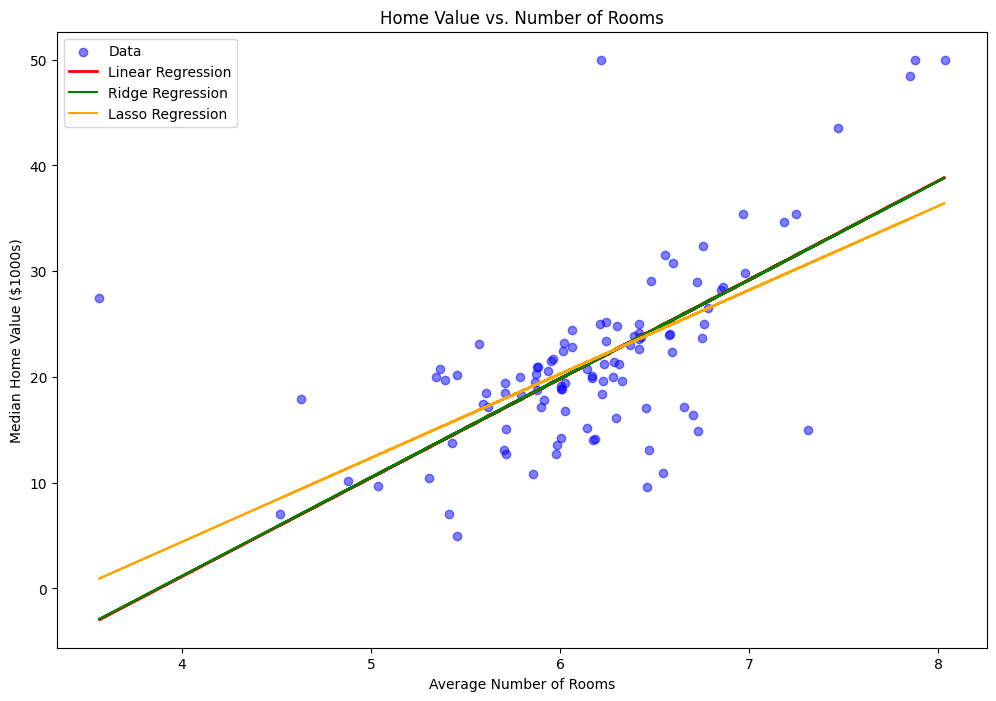

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

X = df[['rm']].values
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scal
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

#predict
y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

def print_metrics(name, model, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:")
    print(f"  Coefficient: {model.coef_[0]:.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  Mean squared error: {mse:.4f}")
    print(f"  R-squared score: {r2:.4f}\n")

print_metrics("Linear Regression", lr, y_test, y_pred_lr)
print_metrics("Ridge Regression", ridge, y_test, y_pred_ridge)
print_metrics("Lasso Regression", lasso, y_test, y_pred_lasso)

plt.figure(figsize=(12, 8))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Data')
plt.plot(X_test, y_pred_lr, color='red', label='Linear Regression', linewidth='2')
plt.plot(X_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.plot(X_test, y_pred_lasso, color='orange', label='Lasso Regression')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Home Value ($1000s)')
plt.title('Home Value vs. Number of Rooms')
plt.legend()
plt.show()